In [1]:
from glob import glob
import os

In [2]:
os.chdir("S:\\antpodGIS\\archive\\Excel Sheets")
csvs = glob("APX00000*")
csvs

['APX00000-XX-2020-01-06-MEAN-INDICES.csv',
 'APX00000-XX-2020-01-16-MEAN-INDICES.csv',
 'APX00000-XX-2020-01-26-MEAN-INDICES.csv',
 'APX00000-XX-2020-02-15-MEAN-INDICES.csv',
 'APX00000-XX-2020-02-25-MEAN-INDICES.csv',
 'APX00000-XX-2020-03-21-MEAN-INDICES.csv',
 'APX00000-XX-2020-03-26-MEAN-INDICES.csv',
 'APX00000-XX-2020-03-31-MEAN-INDICES.csv',
 'APX00000-XX-2020-04-10-MEAN-INDICES.csv',
 'APX00000-XX-2020-04-15-MEAN-INDICES.csv',
 'APX00000-XX-2020-05-30-MEAN-INDICES.csv',
 'APX00000-XX-2020-06-04-MEAN-INDICES.csv',
 'APX00000-XX-2020-06-14-MEAN-INDICES.csv',
 'APX00000-XX-2020-06-19-MEAN-INDICES.csv',
 'APX00000-XX-2020-06-24-MEAN-INDICES.csv']

In [3]:
os.chdir("S:\\antpodGIS\\kaaviyaTestBench")
import gisdataframe as gdf
geo = "FarmKanchi.geojson"
geodf = gdf.retGeoDF(geo, status=False)
geodf.head()

,id,geometry
0,1,"POLYGON ((80.06210 12.81309, 80.06210 12.81279..."
1,1,"POLYGON ((80.06160 12.81279, 80.06210 12.81279..."
2,1,"POLYGON ((80.06160 12.81229, 80.06210 12.81229..."
3,1,"POLYGON ((80.06160 12.81179, 80.06210 12.81179..."
4,1,"POLYGON ((80.06160 12.81129, 80.06210 12.81129..."


In [4]:
import pandas as pd
os.chdir("S:\\antpodGIS\\archive\\Excel Sheets")

In [5]:
index=0
for csv in csvs:
    ndvi = pd.read_csv(csv)['meanNDVI']
    sub = csv.split('-')
    date = [sub[2],sub[3],sub[4]]
    colName = '-'.join(date)
    geodf[colName] = ndvi

In [6]:
geodf.head()

,id,geometry,2020-01-06,2020-01-16,2020-01-26,2020-02-15,2020-02-25,2020-03-21,2020-03-26,2020-03-31,2020-04-10,2020-04-15,2020-05-30,2020-06-04,2020-06-14,2020-06-19,2020-06-24
0,1,"POLYGON ((80.06210 12.81309, 80.06210 12.81279...",0.586341,0.582211,0.573908,0.492993,0.426630,0.364545,0.338907,0.354071,0.362476,0.350513,0.300099,0.303697,0.325700,0.339670,0.367623
1,1,"POLYGON ((80.06160 12.81279, 80.06210 12.81279...",0.658985,0.672761,0.678179,0.589033,0.525963,0.515508,0.462352,0.451207,0.471567,0.492152,0.411297,0.489757,0.489912,0.461674,0.548342
2,1,"POLYGON ((80.06160 12.81229, 80.06210 12.81229...",0.719659,0.734071,0.731913,0.631944,0.569179,0.567709,0.508658,0.495841,0.539802,0.566549,0.485666,0.572853,0.578474,0.554957,0.629079
3,1,"POLYGON ((80.06160 12.81179, 80.06210 12.81179...",0.769298,0.779317,0.753041,0.588601,0.458021,0.516487,0.503208,0.525642,0.672127,0.718076,0.448405,0.469807,0.477838,0.484644,0.505525
4,1,"POLYGON ((80.06160 12.81129, 80.06210 12.81129...",0.763692,0.774995,0.764318,0.587040,0.424751,0.363431,0.373046,0.438590,0.624989,0.626138,0.404885,0.461120,0.468845,0.424638,0.537069


In [7]:
geodf.isnull().sum()

id             0
geometry       0
2020-01-06    17
2020-01-16    17
2020-01-26    17
2020-02-15    17
2020-02-25    17
2020-03-21    17
2020-03-26    17
2020-03-31    17
2020-04-10    17
2020-04-15    17
2020-05-30    17
2020-06-04    17
2020-06-14    17
2020-06-19    17
2020-06-24    17
dtype: int64

In [8]:
geodf = geodf.dropna()

In [9]:
geodf = geodf.drop('id', axis=1)
geodf.head()

,geometry,2020-01-06,2020-01-16,2020-01-26,2020-02-15,2020-02-25,2020-03-21,2020-03-26,2020-03-31,2020-04-10,2020-04-15,2020-05-30,2020-06-04,2020-06-14,2020-06-19,2020-06-24
0,"POLYGON ((80.06210 12.81309, 80.06210 12.81279...",0.586341,0.582211,0.573908,0.492993,0.426630,0.364545,0.338907,0.354071,0.362476,0.350513,0.300099,0.303697,0.325700,0.339670,0.367623
1,"POLYGON ((80.06160 12.81279, 80.06210 12.81279...",0.658985,0.672761,0.678179,0.589033,0.525963,0.515508,0.462352,0.451207,0.471567,0.492152,0.411297,0.489757,0.489912,0.461674,0.548342
2,"POLYGON ((80.06160 12.81229, 80.06210 12.81229...",0.719659,0.734071,0.731913,0.631944,0.569179,0.567709,0.508658,0.495841,0.539802,0.566549,0.485666,0.572853,0.578474,0.554957,0.629079
3,"POLYGON ((80.06160 12.81179, 80.06210 12.81179...",0.769298,0.779317,0.753041,0.588601,0.458021,0.516487,0.503208,0.525642,0.672127,0.718076,0.448405,0.469807,0.477838,0.484644,0.505525
4,"POLYGON ((80.06160 12.81129, 80.06210 12.81129...",0.763692,0.774995,0.764318,0.587040,0.424751,0.363431,0.373046,0.438590,0.624989,0.626138,0.404885,0.461120,0.468845,0.424638,0.537069


In [10]:
geodf.isnull().sum()

geometry      0
2020-01-06    0
2020-01-16    0
2020-01-26    0
2020-02-15    0
2020-02-25    0
2020-03-21    0
2020-03-26    0
2020-03-31    0
2020-04-10    0
2020-04-15    0
2020-05-30    0
2020-06-04    0
2020-06-14    0
2020-06-19    0
2020-06-24    0
dtype: int64

In [11]:
geodf.describe()

,2020-01-06,2020-01-16,2020-01-26,2020-02-15,2020-02-25,2020-03-21,2020-03-26,2020-03-31,2020-04-10,2020-04-15,2020-05-30,2020-06-04,2020-06-14,2020-06-19,2020-06-24
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,0.410616,0.548536,0.595152,0.594800,0.529750,0.517241,0.450305,0.416687,0.385813,0.360216,0.283386,0.316711,0.367647,0.383186,0.456931
std,0.157229,0.127579,0.133901,0.162041,0.189322,0.195839,0.151993,0.131398,0.131781,0.139483,0.094524,0.138895,0.153951,0.154279,0.169422
min,0.009875,0.072428,0.004840,0.126412,0.043535,-0.856943,0.047723,0.043031,-0.000630,-0.025942,0.063967,-0.006172,-0.006995,0.014803,0.000683
25%,0.285183,0.467788,0.511056,0.468078,0.379221,0.365629,0.323876,0.313332,0.282381,0.254400,0.212628,0.207424,0.240852,0.258485,0.321918
50%,0.402340,0.563446,0.615528,0.616922,0.544282,0.520686,0.444592,0.414055,0.373207,0.335075,0.268840,0.286536,0.334975,0.360172,0.435249
75%,0.527591,0.639266,0.699046,0.743867,0.702841,0.681746,0.563360,0.508879,0.469414,0.434768,0.335508,0.401940,0.477374,0.491012,0.588399
max,0.769298,0.824160,0.863583,0.862567,0.819418,0.903095,0.792611,0.741051,0.757050,0.787410,0.647979,0.800795,0.806094,0.801518,0.864850


In [12]:
x = geodf.describe()

In [14]:
x.loc['min'].loc['2020-01-06':'2020-06-24'].min(axis=0)

-0.8569429264243011

In [15]:
x.loc['max'].loc['2020-01-06':'2020-06-24'].max(axis=0)

0.9030951400992488

In [16]:
x.loc['min'].loc['2020-01-06':'2020-06-24'].idxmin()

'2020-03-21'

In [17]:
columns = list(geodf.columns[1:])

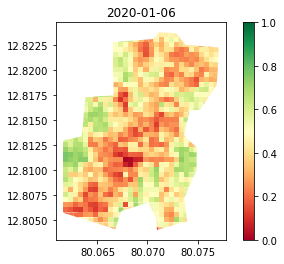

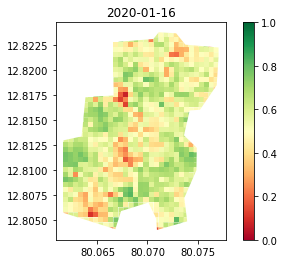

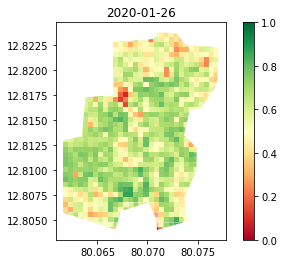

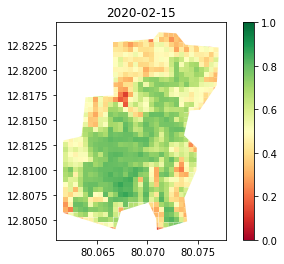

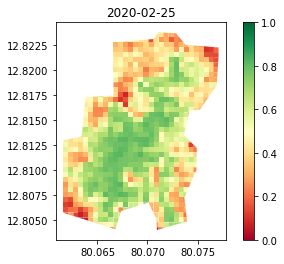

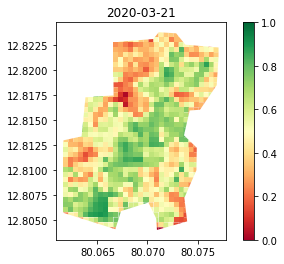

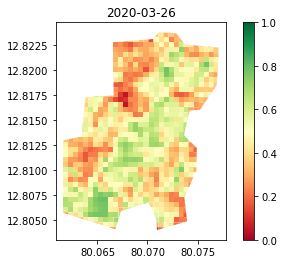

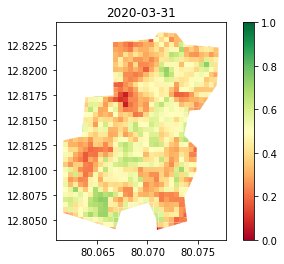

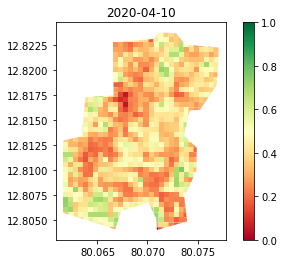

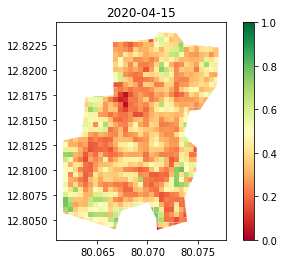

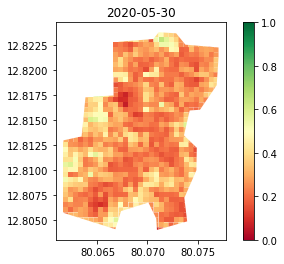

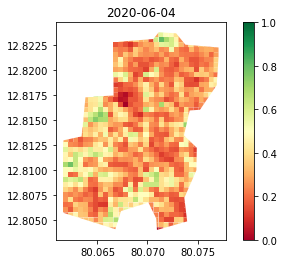

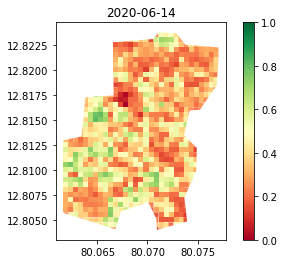

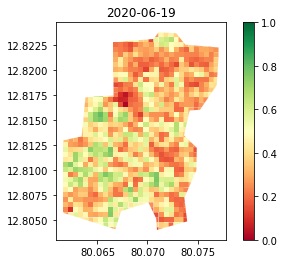

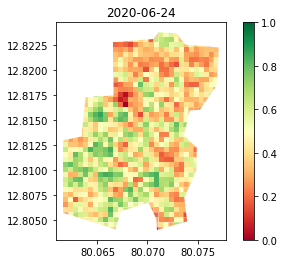

In [18]:
import matplotlib.pyplot as plt
for col in columns:
    geodf.plot(col, cmap='RdYlGn', legend = True, vmin=0, vmax=1.0)
    #geodf.boundary.plot(ax=plt.gca(), color='k') 
    plt.title(col)

In [19]:
data = geodf.describe().T
data[data<0] = 0
data.head()

,count,mean,std,min,25%,50%,75%,max
2020-01-06,879.0,0.410616,0.157229,0.009875,0.285183,0.402340,0.527591,0.769298
2020-01-16,879.0,0.548536,0.127579,0.072428,0.467788,0.563446,0.639266,0.824160
2020-01-26,879.0,0.595152,0.133901,0.004840,0.511056,0.615528,0.699046,0.863583
2020-02-15,879.0,0.594800,0.162041,0.126412,0.468078,0.616922,0.743867,0.862567
2020-02-25,879.0,0.529750,0.189322,0.043535,0.379221,0.544282,0.702841,0.819418


In [34]:
%matplotlib inline

In [39]:
import pandas as pd

In [41]:
df1 = pd.DataFrame([data['min'], data['max'], data['mean']])
df1 = df1.T
df1.head()

,min,max,mean
2020-01-06,0.009875,0.769298,0.410616
2020-01-16,0.072428,0.824160,0.548536
2020-01-26,0.004840,0.863583,0.595152
2020-02-15,0.126412,0.862567,0.594800
2020-02-25,0.043535,0.819418,0.529750


In [44]:
am = list(data.index)
df2 = df1.copy()
df2.reset_index(level=0, inplace=True)
df2.rename(columns = {'index':'Date'}, inplace = True) 
df2.head()

,Date,min,max,mean
0,2020-01-06,0.009875,0.769298,0.410616
1,2020-01-16,0.072428,0.824160,0.548536
2,2020-01-26,0.004840,0.863583,0.595152
3,2020-02-15,0.126412,0.862567,0.594800
4,2020-02-25,0.043535,0.819418,0.529750


In [45]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2.head()

,Date,min,max,mean
0,2020-01-06,0.009875,0.769298,0.410616
1,2020-01-16,0.072428,0.824160,0.548536
2,2020-01-26,0.004840,0.863583,0.595152
3,2020-02-15,0.126412,0.862567,0.594800
4,2020-02-25,0.043535,0.819418,0.529750


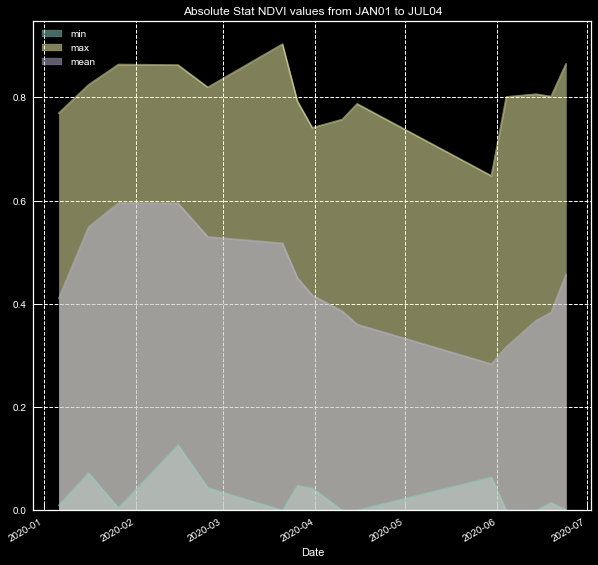

In [88]:
df1.set_index(df2['Date']).plot.area(stacked=False, figsize=(10,10))
plt.title('Absolute Stat NDVI values from JAN01 to JUL04') 
plt.legend(loc='best')
plt.show()

In [54]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [86]:
plt.style.use(['seaborn-notebook', 'dark_background'])

In [89]:
import matplotlib as mpl

In [126]:
x = df2['Date']
y = df2['mean']

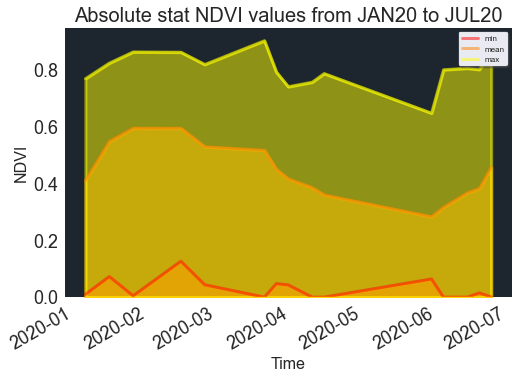

In [217]:
plt.style.use('seaborn')
#fig = plt.figure(figsize=(10,10))
#ax = plt.axes()
#ax.set_facecolor('#1d262e')

ax = df2.plot.area(x='Date', y=['min', 'mean', 'max'], linewidth=3, grid=False, stacked=False, colormap='autumn')
ax.set_facecolor('#1d262e')
#plt.plot(x, y, 'o-', color="#00bb31", linewidth=3, markersize=10)

plt.xlabel("Time", fontsize=16)
plt.ylabel("NDVI", fontsize=16)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.title('Absolute stat NDVI values from JAN20 to JUL20', fontsize=20)
plt.legend(['min', 'mean', 'max'], fancybox=True, shadow=True, loc='upper right', frameon = True, prop={'size': 8})
plt.show()

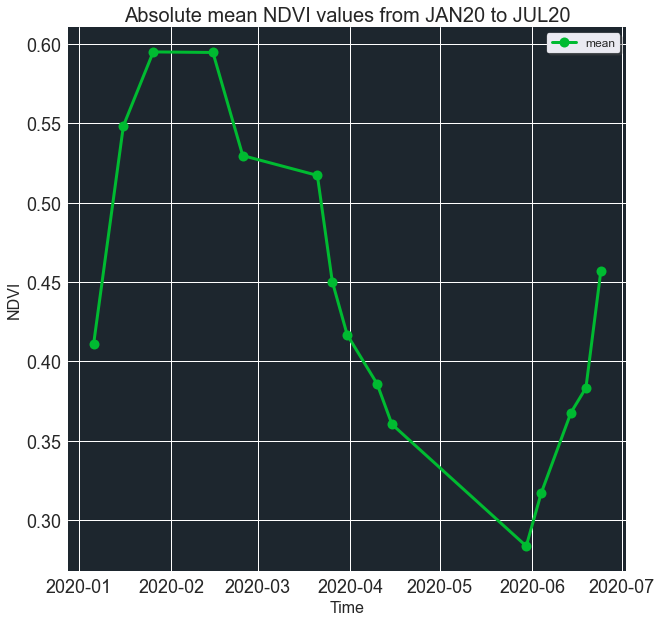

In [159]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_facecolor('#1d262e')

plt.plot(x, y, 'o-', color="#00bb31", linewidth=3, markersize=10)

plt.xlabel("Time", fontsize=16)
plt.ylabel("NDVI", fontsize=16)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.title('Absolute mean NDVI values from JAN20 to JUL20', fontsize=20)
plt.legend(['mean'], fancybox=True, shadow=True, loc='best', frameon = True, prop={'size': 12})
plt.show()

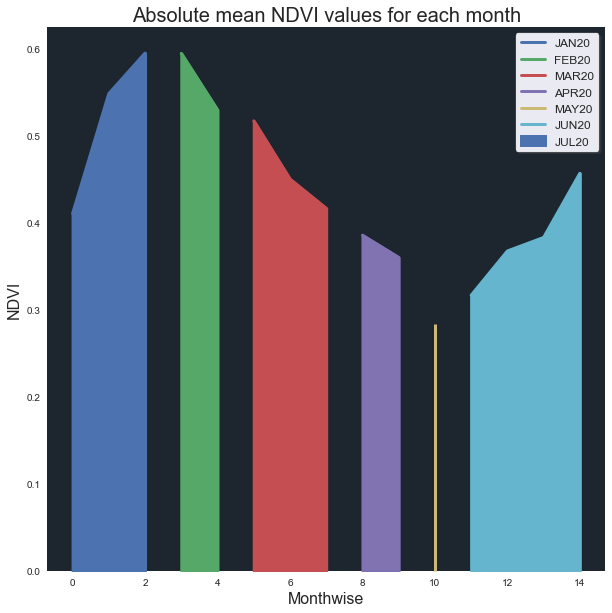

In [255]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes()
ax.set_facecolor('#1d262e')

df2.groupby([df2['Date'].dt.month], sort=False).plot.area(y='mean', stacked=True, linewidth=3, grid=False, ax=ax)

plt.xlabel("Monthwise", fontsize=16)
plt.ylabel("NDVI", fontsize=16)

plt.title('Absolute mean NDVI values for each month', fontsize=20)
plt.legend(['JAN20', 'FEB20', 'MAR20', 'APR20', 'MAY20', 'JUN20', 'JUL20'], fancybox=True, shadow=True, loc='best', frameon = True, prop={'size': 12})

plt.show()